# Customer Satisfaction Analysis

1. Loading the customer reviews dataset
2. Clean and preprocess the reviews
3. Tokenize the reviews and removing the stop words
4. Exploring the tokens and product categories
5. Extracting the adjectives in the reviews
6. Finding the sentiment of each review

#### Import Modules

In [6]:
import pandas as pd 
import string 

# Importing Natural Language Processing toolkit 
import nltk

# Downloading the NLTK english stop words
nltk.download('stopwords')

# Downloading the NLTK sentence tokenizer
nltk.download('punkt')

# Downloading the NLTK POS Tagger
nltk.download('averaged_perceptron_tagger')

# Downloading the NLTK Vader Lexicon
nltk.download('vader_lexicon')

# Importing the NLTK english stop words 
from nltk.corpus import stopwords

# Importing frequency distribution from NLTK
from nltk.probability import FreqDist

# Importing VADER dictionary. It is a rule-based sentiment analyzer
from nltk.sentiment import SentimentIntensityAnalyzer

# Importing data visualization modules 
from wordcloud import WordCloud
import plotly.express as px 
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


#### 1. Load Dataset

In [5]:
data = pd.read_csv("./public/reviews-dataset.csv")

Check first 5 elements

In [8]:
data.head()

,product_review,product_category
0,"I love, love, love this jumpsuit. it's fun, fl...",Bottoms
1,Beautifully made pants and on trend with the f...,Bottoms
2,I never would have given these pants a second ...,Bottoms
3,These pants are even better in person. the onl...,Bottoms
4,The silhouette and length of this skirt and le...,Bottoms


Check the shape of the DataFrame

In [9]:
data.shape

(3376, 2)

Check one product review

In [10]:
data.product_review[0]

"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!"

Check #.of Reviews pre Category

In [13]:
data.product_category.value_counts()

product_category
Bottoms     685
Dresses     681
Tops        680
Jackets     680
Intimate    650
Name: count, dtype: int64

#### 2. Clean Dataset

Convert the reviews into Lower Case

In [16]:
review = data.product_review[0]
review.lower()

"i love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!"

In [18]:
data.product_review = data.product_review.str.lower()

In [19]:
data.head()

,product_review,product_category
0,"i love, love, love this jumpsuit. it's fun, fl...",Bottoms
1,beautifully made pants and on trend with the f...,Bottoms
2,i never would have given these pants a second ...,Bottoms
3,these pants are even better in person. the onl...,Bottoms
4,the silhouette and length of this skirt and le...,Bottoms


Removing puctuations

In [20]:
data.product_review[0].translate(str.maketrans('','',string.punctuation))

'i love love love this jumpsuit its fun flirty and fabulous every time i wear it i get nothing but great compliments'

In [21]:
data.product_review = data.product_review.str.translate(str.maketrans('','',string.punctuation))

In [23]:
data.product_review.head()

0    i love love love this jumpsuit its fun flirty ...
1    beautifully made pants and on trend with the f...
2    i never would have given these pants a second ...
3    these pants are even better in person the only...
4    the silhouette and length of this skirt and le...
Name: product_review, dtype: object

#### 3. Tokenize & Remove Stopwords

Tokenize Reviews

In [25]:
tokens = nltk.word_tokenize(data.product_review[0])

In [26]:
tokens

['i',
 'love',
 'love',
 'love',
 'this',
 'jumpsuit',
 'its',
 'fun',
 'flirty',
 'and',
 'fabulous',
 'every',
 'time',
 'i',
 'wear',
 'it',
 'i',
 'get',
 'nothing',
 'but',
 'great',
 'compliments']

Remove the Stopwords (Common words (e.g., "the," "and," "is") that appear frequently in a language and have little semantic value)

In [28]:
en_stopwords = stopwords.words("English")
en_stopwords.extend(['im','its','youre','thing','cant','dont','doesnt'])

In [29]:
[t for t in tokens if t not in en_stopwords]

['love',
 'love',
 'love',
 'jumpsuit',
 'fun',
 'flirty',
 'fabulous',
 'every',
 'time',
 'wear',
 'get',
 'nothing',
 'great',
 'compliments']

In [31]:
data['product_review_tokenized'] = data.product_review.apply(nltk.word_tokenize)

In [32]:
data.head()

,product_review,product_category,product_review_tokenized
0,i love love love this jumpsuit its fun flirty ...,Bottoms,"[i, love, love, love, this, jumpsuit, its, fun..."
1,beautifully made pants and on trend with the f...,Bottoms,"[beautifully, made, pants, and, on, trend, wit..."
2,i never would have given these pants a second ...,Bottoms,"[i, never, would, have, given, these, pants, a..."
3,these pants are even better in person the only...,Bottoms,"[these, pants, are, even, better, in, person, ..."
4,the silhouette and length of this skirt and le...,Bottoms,"[the, silhouette, and, length, of, this, skirt..."


Remove all stopwords

In [34]:
def remove_stopwords(tokens):
    return [t for t in tokens if t not in en_stopwords]

data['cleaned_tokens'] = data.product_review_tokenized.apply(remove_stopwords)
data.head()

,product_review,product_category,product_review_tokenized,cleaned_tokens
0,i love love love this jumpsuit its fun flirty ...,Bottoms,"[i, love, love, love, this, jumpsuit, its, fun...","[love, love, love, jumpsuit, fun, flirty, fabu..."
1,beautifully made pants and on trend with the f...,Bottoms,"[beautifully, made, pants, and, on, trend, wit...","[beautifully, made, pants, trend, flared, crop..."
2,i never would have given these pants a second ...,Bottoms,"[i, never, would, have, given, these, pants, a...","[never, would, given, pants, second, look, onl..."
3,these pants are even better in person the only...,Bottoms,"[these, pants, are, even, better, in, person, ...","[pants, even, better, person, downside, need, ..."
4,the silhouette and length of this skirt and le...,Bottoms,"[the, silhouette, and, length, of, this, skirt...","[silhouette, length, skirt, length, flattering..."


Recreate the reviews from the cleaned tokens

In [37]:
tokens = data.cleaned_tokens[0]
' '.join(tokens)

'love love love jumpsuit fun flirty fabulous every time wear get nothing great compliments'

In [38]:
data['product_review_cleaned'] = data.cleaned_tokens.apply(lambda x: ' '.join(x))
data.head()

,product_review,product_category,product_review_tokenized,cleaned_tokens,product_review_cleaned
0,i love love love this jumpsuit its fun flirty ...,Bottoms,"[i, love, love, love, this, jumpsuit, its, fun...","[love, love, love, jumpsuit, fun, flirty, fabu...",love love love jumpsuit fun flirty fabulous ev...
1,beautifully made pants and on trend with the f...,Bottoms,"[beautifully, made, pants, and, on, trend, wit...","[beautifully, made, pants, trend, flared, crop...",beautifully made pants trend flared crop much ...
2,i never would have given these pants a second ...,Bottoms,"[i, never, would, have, given, these, pants, a...","[never, would, given, pants, second, look, onl...",never would given pants second look online per...
3,these pants are even better in person the only...,Bottoms,"[these, pants, are, even, better, in, person, ...","[pants, even, better, person, downside, need, ...",pants even better person downside need dry cle...
4,the silhouette and length of this skirt and le...,Bottoms,"[the, silhouette, and, length, of, this, skirt...","[silhouette, length, skirt, length, flattering...",silhouette length skirt length flattering clas...


#### 4. Explore Tokens and Product Categories

In [39]:
data.product_category.value_counts()

product_category
Bottoms     685
Dresses     681
Tops        680
Jackets     680
Intimate    650
Name: count, dtype: int64

We select Tops, to find all related tokens for the Tops category.

In [44]:
tops_tokens = []

for x in data[data.product_category == 'Tops'].cleaned_tokens:
    tops_tokens.extend(x)

tops_tokens

['shirt',
 'flattering',
 'due',
 'adjustable',
 'front',
 'tie',
 'perfect',
 'length',
 'wear',
 'leggings',
 'sleeveless',
 'pairs',
 'well',
 'cardigan',
 'love',
 'shirt',
 'aded',
 'basket',
 'hte',
 'last',
 'mintue',
 'see',
 'would',
 'look',
 'like',
 'person',
 'store',
 'pick',
 'went',
 'teh',
 'darkler',
 'color',
 'pale',
 'hte',
 'color',
 'really',
 'gorgeous',
 'turns',
 'mathced',
 'everythiing',
 'trying',
 'prefectly',
 'little',
 'baggy',
 'hte',
 'xs',
 'hte',
 'msallet',
 'size',
 'bummer',
 'petite',
 'decided',
 'jkeep',
 'though',
 'said',
 'matvehd',
 'everything',
 'ejans',
 'pants',
 '3',
 'skirts',
 'waas',
 'trying',
 'kept',
 'oops',
 'took',
 'chance',
 'blouse',
 'glad',
 'wasnt',
 'crazy',
 'blouse',
 'photographed',
 'model',
 'paired',
 'whit',
 'white',
 'pants',
 'worked',
 'perfectly',
 'crisp',
 'clean',
 'would',
 'describe',
 'launders',
 'well',
 'fits',
 'great',
 'drape',
 'perfect',
 'wear',
 'tucked',
 'go',
 'wrong',
 'love',
 'shirt',


Find the 20 most common tokens for 'Tops'

In [45]:
freq_dist = FreqDist(tops_tokens)
freq_dist.most_common(20)

[('love', 337),
 ('top', 334),
 ('wear', 233),
 ('great', 229),
 ('size', 211),
 ('color', 185),
 ('shirt', 172),
 ('fit', 167),
 ('perfect', 146),
 ('small', 141),
 ('like', 140),
 ('soft', 136),
 ('flattering', 128),
 ('little', 120),
 ('one', 119),
 ('sweater', 118),
 ('fits', 112),
 ('bought', 111),
 ('well', 109),
 ('would', 109)]

Find the 20 most common tokens for 'Dresses'

In [46]:
dress_tokens = []

for x in data[data.product_category == 'Dresses'].cleaned_tokens:
    dress_tokens.extend(x)

freq_dist = FreqDist(dress_tokens)
freq_dist.most_common(20)

[('dress', 1062),
 ('like', 321),
 ('fabric', 254),
 ('would', 220),
 ('size', 207),
 ('fit', 207),
 ('back', 166),
 ('look', 157),
 ('really', 154),
 ('love', 152),
 ('ordered', 146),
 ('material', 139),
 ('small', 128),
 ('looks', 119),
 ('looked', 118),
 ('much', 111),
 ('also', 106),
 ('top', 105),
 ('wear', 105),
 ('way', 103)]

#### 5. Extracting Adjectives

In [47]:
data.head()

,product_review,product_category,product_review_tokenized,cleaned_tokens,product_review_cleaned
0,i love love love this jumpsuit its fun flirty ...,Bottoms,"[i, love, love, love, this, jumpsuit, its, fun...","[love, love, love, jumpsuit, fun, flirty, fabu...",love love love jumpsuit fun flirty fabulous ev...
1,beautifully made pants and on trend with the f...,Bottoms,"[beautifully, made, pants, and, on, trend, wit...","[beautifully, made, pants, trend, flared, crop...",beautifully made pants trend flared crop much ...
2,i never would have given these pants a second ...,Bottoms,"[i, never, would, have, given, these, pants, a...","[never, would, given, pants, second, look, onl...",never would given pants second look online per...
3,these pants are even better in person the only...,Bottoms,"[these, pants, are, even, better, in, person, ...","[pants, even, better, person, downside, need, ...",pants even better person downside need dry cle...
4,the silhouette and length of this skirt and le...,Bottoms,"[the, silhouette, and, length, of, this, skirt...","[silhouette, length, skirt, length, flattering...",silhouette length skirt length flattering clas...


Parts of Speech (POS) Tagging

In [48]:
nltk.pos_tag(data.product_review_tokenized[0])

[('i', 'NN'),
 ('love', 'VBP'),
 ('love', 'NN'),
 ('love', 'NN'),
 ('this', 'DT'),
 ('jumpsuit', 'NN'),
 ('its', 'PRP$'),
 ('fun', 'NN'),
 ('flirty', 'NN'),
 ('and', 'CC'),
 ('fabulous', 'JJ'),
 ('every', 'DT'),
 ('time', 'NN'),
 ('i', 'NN'),
 ('wear', 'VBP'),
 ('it', 'PRP'),
 ('i', 'JJ'),
 ('get', 'VBP'),
 ('nothing', 'NN'),
 ('but', 'CC'),
 ('great', 'JJ'),
 ('compliments', 'NNS')]

POS Tagging for all the Tokens

In [49]:
data['POS_tokens'] = data.product_review_tokenized.apply(nltk.pos_tag)
data.head()

,product_review,product_category,product_review_tokenized,cleaned_tokens,product_review_cleaned,POS_tokens
0,i love love love this jumpsuit its fun flirty ...,Bottoms,"[i, love, love, love, this, jumpsuit, its, fun...","[love, love, love, jumpsuit, fun, flirty, fabu...",love love love jumpsuit fun flirty fabulous ev...,"[(i, NN), (love, VBP), (love, NN), (love, NN),..."
1,beautifully made pants and on trend with the f...,Bottoms,"[beautifully, made, pants, and, on, trend, wit...","[beautifully, made, pants, trend, flared, crop...",beautifully made pants trend flared crop much ...,"[(beautifully, RB), (made, VBN), (pants, NNS),..."
2,i never would have given these pants a second ...,Bottoms,"[i, never, would, have, given, these, pants, a...","[never, would, given, pants, second, look, onl...",never would given pants second look online per...,"[(i, NN), (never, RB), (would, MD), (have, VB)..."
3,these pants are even better in person the only...,Bottoms,"[these, pants, are, even, better, in, person, ...","[pants, even, better, person, downside, need, ...",pants even better person downside need dry cle...,"[(these, DT), (pants, NNS), (are, VBP), (even,..."
4,the silhouette and length of this skirt and le...,Bottoms,"[the, silhouette, and, length, of, this, skirt...","[silhouette, length, skirt, length, flattering...",silhouette length skirt length flattering clas...,"[(the, DT), (silhouette, NN), (and, CC), (leng..."


Extract Adjectives used in text

In [50]:
def extract_adj(tokens):
    adjectives = []
    for x in tokens:
        if x[1] in ['JJ','JJR','JJS']:
            adjectives.append(x[0])

    return adjectives

data['adjectives'] = data.POS_tokens.apply(extract_adj)
data.head()

,product_review,product_category,product_review_tokenized,cleaned_tokens,product_review_cleaned,POS_tokens,adjectives
0,i love love love this jumpsuit its fun flirty ...,Bottoms,"[i, love, love, love, this, jumpsuit, its, fun...","[love, love, love, jumpsuit, fun, flirty, fabu...",love love love jumpsuit fun flirty fabulous ev...,"[(i, NN), (love, VBP), (love, NN), (love, NN),...","[fabulous, i, great]"
1,beautifully made pants and on trend with the f...,Bottoms,"[beautifully, made, pants, and, on, trend, wit...","[beautifully, made, pants, trend, flared, crop...",beautifully made pants trend flared crop much ...,"[(beautifully, RB), (made, VBN), (pants, NNS),...","[flared, much]"
2,i never would have given these pants a second ...,Bottoms,"[i, never, would, have, given, these, pants, a...","[never, would, given, pants, second, look, onl...",never would given pants second look online per...,"[(i, NN), (never, RB), (would, MD), (have, VB)...","[second, much, cuter, right, small, loose, navy]"
3,these pants are even better in person the only...,Bottoms,"[these, pants, are, even, better, in, person, ...","[pants, even, better, person, downside, need, ...",pants even better person downside need dry cle...,"[(these, DT), (pants, NNS), (are, VBP), (even,...","[only, dry]"
4,the silhouette and length of this skirt and le...,Bottoms,"[the, silhouette, and, length, of, this, skirt...","[silhouette, length, skirt, length, flattering...",silhouette length skirt length flattering clas...,"[(the, DT), (silhouette, NN), (and, CC), (leng...","[classic, comfortable, favorite, different, hi..."


Combine all adjectives for tops

In [52]:
adj_tops = ""
for x in data[data.product_category == 'Tops'].adjectives:
    adj_tops += ' '.join(x) + ' '

adj_tops

'flattering due adjustable perfect cardigan last i pale gorgeous little hte ejans i glad i white crisp clean i great perfect wear cant wrong wasnt seethrough white careful i great comfy classic quirky beautiful practical cropped boxy perfect longer camisole little thin small gorgeous unsnapped skinny true great casual flare grey back nice beautiful ordinary usual tight chest i cute plaid great local comfortable bad little dressier small black top comfortable comfortable good perfect roomy warm cute collar beautiful unique busty top small wouldve fit better adorable bib favorite small perfect soft comfortable unusual asymmetrical front visual little ive adorable i comfortable feminine great dark perfect wish happy comfortable flattering comfortable light top lovely floral great white top happy top online little i little large petite longer regular perfect give soft comfortable short much uncomfortable doesnt easier navy boxy whole cute more fabric i super read same specific petite weigh

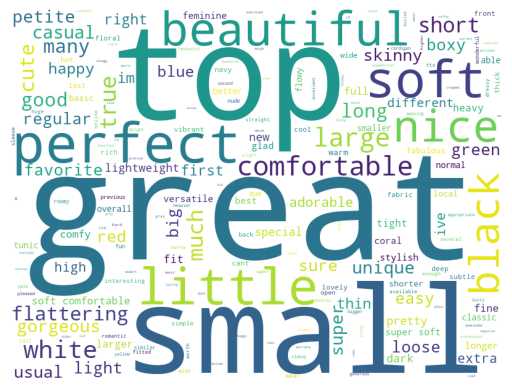

In [54]:
word_cloud = WordCloud(width=800, height=600, background_color='white').generate(adj_tops)
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

Method to get a word cloud for any product category

In [55]:
def get_wordcloud(category):
    adj = ""
    for x in data[data.product_category == category ].adjectives:
        adj += ' '.join(x) + ' '

    word_cloud = WordCloud(width=800, height=600, background_color='white').generate(adj)
    plt.imshow(word_cloud)
    plt.axis('off')
    plt.show()

#### 6. Sentiment Analysis

In [58]:
data.head()

,product_review,product_category,product_review_tokenized,cleaned_tokens,product_review_cleaned,POS_tokens,adjectives
0,i love love love this jumpsuit its fun flirty ...,Bottoms,"[i, love, love, love, this, jumpsuit, its, fun...","[love, love, love, jumpsuit, fun, flirty, fabu...",love love love jumpsuit fun flirty fabulous ev...,"[(i, NN), (love, VBP), (love, NN), (love, NN),...","[fabulous, i, great]"
1,beautifully made pants and on trend with the f...,Bottoms,"[beautifully, made, pants, and, on, trend, wit...","[beautifully, made, pants, trend, flared, crop...",beautifully made pants trend flared crop much ...,"[(beautifully, RB), (made, VBN), (pants, NNS),...","[flared, much]"
2,i never would have given these pants a second ...,Bottoms,"[i, never, would, have, given, these, pants, a...","[never, would, given, pants, second, look, onl...",never would given pants second look online per...,"[(i, NN), (never, RB), (would, MD), (have, VB)...","[second, much, cuter, right, small, loose, navy]"
3,these pants are even better in person the only...,Bottoms,"[these, pants, are, even, better, in, person, ...","[pants, even, better, person, downside, need, ...",pants even better person downside need dry cle...,"[(these, DT), (pants, NNS), (are, VBP), (even,...","[only, dry]"
4,the silhouette and length of this skirt and le...,Bottoms,"[the, silhouette, and, length, of, this, skirt...","[silhouette, length, skirt, length, flattering...",silhouette length skirt length flattering clas...,"[(the, DT), (silhouette, NN), (and, CC), (leng...","[classic, comfortable, favorite, different, hi..."


In [65]:
sent = SentimentIntensityAnalyzer()
review = data.product_review_cleaned[0]

score = sent.polarity_scores(review)
score

{'neg': 0.171, 'neu': 0.185, 'pos': 0.644, 'compound': 0.9464}

- `pos`- The probability of `positive` sentiment
- `neu`- The probability of `neutral` sentiment
- `neg`- The probability of `negative` sentiment
- `compound`- The normalized `compound` score that takes values from -1 to 1

We can use the `compound` score to find the sentiment of each review.

- if compound score>=0.05 then `positive` 
- if compound score between -0.05 and 0.05 then `neutral` 
- if compound score<=-0.05 then `negative` 


Analyze sentiment of each review

In [66]:
def polarity_score(review):
    # Initilizing the Sentiment Analyzer
    sent = SentimentIntensityAnalyzer()
   
    # Extracting the sentiment polarity scores of a review
    scores = sent.polarity_scores(review)
    
    # Getting the compound score
    compound = scores['compound']
    
    if compound > 0.05:
        return "positive"
    elif compound < -0.5:
        return "negative"
    else:
        return "neutral"

In [67]:
polarity_score(data.product_review_cleaned[4])

'positive'

Label all reviews with sentiment

In [71]:
data['sentiment'] = data.product_review_cleaned.apply(polarity_score)
data.head()

,product_review,product_category,product_review_tokenized,cleaned_tokens,product_review_cleaned,POS_tokens,adjectives,sentiment
0,i love love love this jumpsuit its fun flirty ...,Bottoms,"[i, love, love, love, this, jumpsuit, its, fun...","[love, love, love, jumpsuit, fun, flirty, fabu...",love love love jumpsuit fun flirty fabulous ev...,"[(i, NN), (love, VBP), (love, NN), (love, NN),...","[fabulous, i, great]",positive
1,beautifully made pants and on trend with the f...,Bottoms,"[beautifully, made, pants, and, on, trend, wit...","[beautifully, made, pants, trend, flared, crop...",beautifully made pants trend flared crop much ...,"[(beautifully, RB), (made, VBN), (pants, NNS),...","[flared, much]",positive
2,i never would have given these pants a second ...,Bottoms,"[i, never, would, have, given, these, pants, a...","[never, would, given, pants, second, look, onl...",never would given pants second look online per...,"[(i, NN), (never, RB), (would, MD), (have, VB)...","[second, much, cuter, right, small, loose, navy]",positive
3,these pants are even better in person the only...,Bottoms,"[these, pants, are, even, better, in, person, ...","[pants, even, better, person, downside, need, ...",pants even better person downside need dry cle...,"[(these, DT), (pants, NNS), (are, VBP), (even,...","[only, dry]",positive
4,the silhouette and length of this skirt and le...,Bottoms,"[the, silhouette, and, length, of, this, skirt...","[silhouette, length, skirt, length, flattering...",silhouette length skirt length flattering clas...,"[(the, DT), (silhouette, NN), (and, CC), (leng...","[classic, comfortable, favorite, different, hi...",positive


In [73]:
df = data.groupby(["product_category","sentiment"]).size().reset_index(name="counts")
df

,product_category,sentiment,counts
0,Bottoms,neutral,6
1,Bottoms,positive,679
2,Dresses,negative,35
3,Dresses,neutral,76
4,Dresses,positive,570
5,Intimate,negative,3
6,Intimate,neutral,33
7,Intimate,positive,614
8,Jackets,negative,2
9,Jackets,neutral,8


In [76]:
px.bar(df, x="product_category",y="counts",color="sentiment",barmode="group")

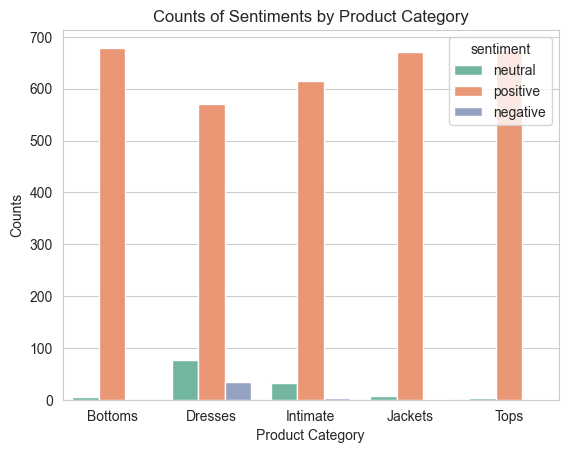

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

sns.barplot(data=df, x="product_category", y="counts", hue="sentiment", palette="Set2")

plt.title('Counts of Sentiments by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Counts')
plt.show()